# OWN PCA IMPLEMENTATION & COMPARISON WITH SKLEARN IMPLEMENTATION

## Importing Libraries

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import AgglomerativeClustering
import scipy.linalg as SLA

data_path = '../data/processed/' 

## Reading Pre-procesed Data

In [2]:
data = pd.read_csv(data_path + 'iris.csv', index_col=0)
x = data.iloc[:,:4].to_numpy()
y = data.iloc[:,4]

In [3]:
set(y)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [4]:
data

,sepallength,sepalwidth,petallength,petalwidth,y_true
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [5]:
m =  {k:v for v,k in enumerate(set(y))}

In [6]:
y_enc = [m[i] for i in y]

In [7]:
x.shape, y.shape

((150, 4), (150,))

In [8]:
x[:, 0].shape

(150,)

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

y = y
labelencoder_y= LabelEncoder()  
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Plotting Data

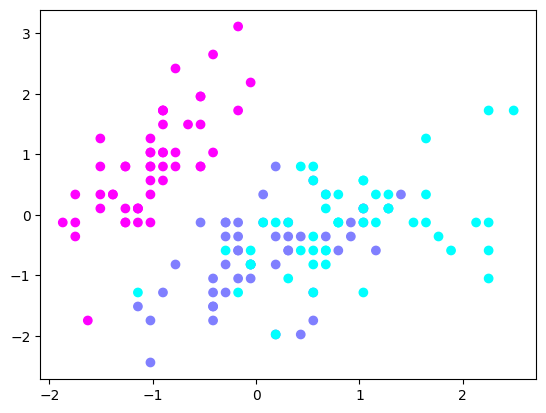

In [10]:
plt.scatter(x[:, 0] ,x[:, 1], c= y_enc, cmap='cool',)

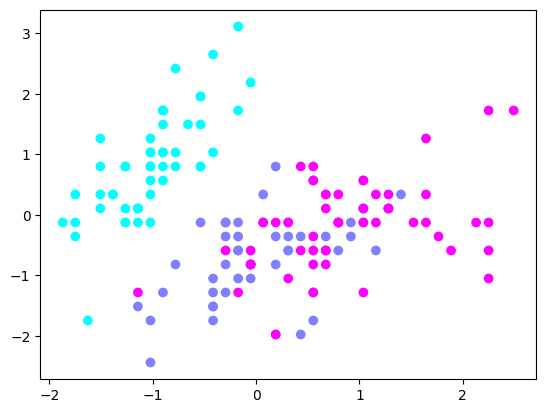

In [13]:
plt.scatter(x[:, 0], x[:, 1], c= y, cmap='cool',)

In [14]:
def scatter_4D(data, labels):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, s=data[:,3]*10)
    plt.show()

In [15]:
def scatter_3D(data, labels):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, s=15)
    plt.show()

c:\Users\mario\anaconda3\envs\IML\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


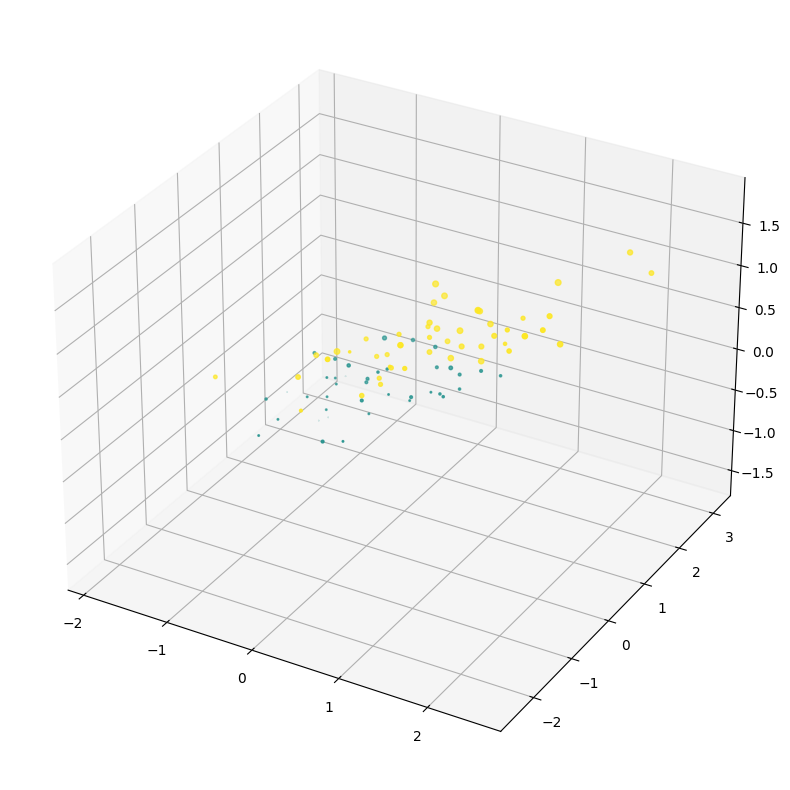

In [16]:
scatter_4D(x,y)

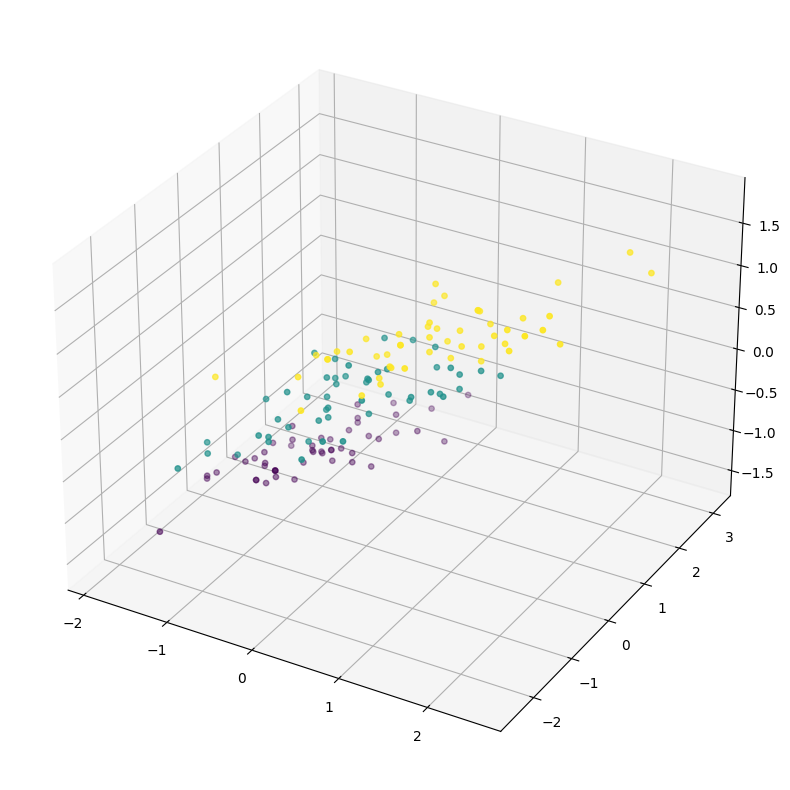

In [16]:
scatter_3D(X,Y)

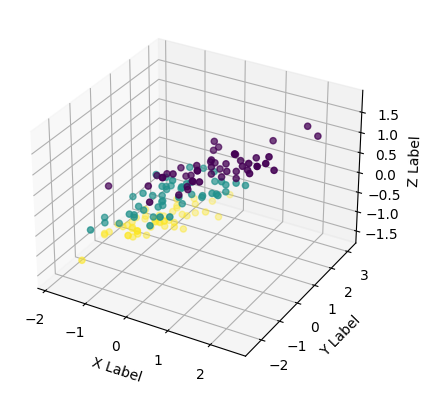

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2], c=y_enc)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Testing Agglo

In [18]:
# Agglomerative Clustering
Xdf = data.iloc[:,:-1]
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', 
                                     linkage='complete', compute_distances=True).fit(Xdf)

clustering.distances_[:10]

array([0.        , 0.        , 0.        , 0.12116787, 0.12116787,
       0.13147297, 0.13147297, 0.13384828, 0.13384828, 0.14324402])

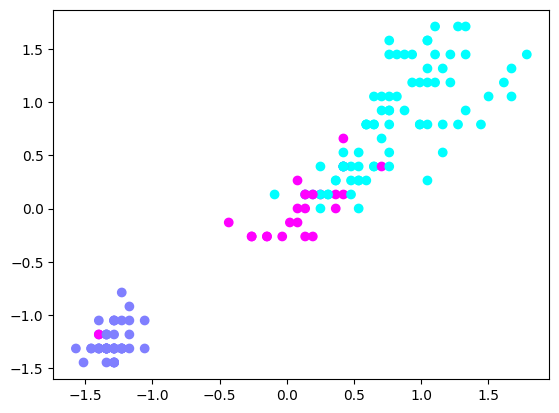

In [19]:
plt.scatter(Xdf['petallength'] ,Xdf['petalwidth'], c= clustering.labels_, cmap='cool')



## Principal Component Analysis Step by Step

### Defining Toy Data

In [103]:
X =np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
Y = np.array([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])
data = np.array([X, Y]).T
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

### Getting Mean of All Axes

In [104]:
x_mean = np.mean(X.T)
y_mean = np.mean(Y.T)

x_mean, y_mean


(1.81, 1.9100000000000001)

### Substracting Mean from Every Data Point 

In [105]:
x_sub = X.T - x_mean
y_sub = Y.T - y_mean

x_sub.T,y_sub.T

(array([ 0.69, -1.31,  0.39,  0.09,  1.29,  0.49,  0.19, -0.81, -0.31,
        -0.71]),
 array([ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01]))

### Calculating covariance matrix

In [40]:
cov = np.array([[0,0],[0,0]], dtype=float)
cov[0,1] = sum([x_i*y_i for x_i, y_i in zip(x_sub,y_sub)])/(len(x_sub)-1)
cov[1,0] = cov[0,1]
cov[0,0] = sum([x_i*y_i for x_i, y_i in zip(x_sub,x_sub)])/(len(x_sub)-1)
cov[1,1] = sum([x_i*y_i for x_i, y_i in zip(y_sub,y_sub)])/(len(x_sub)-1)


In [27]:
cov

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

### Getting Eigen-values & Eigen-vectors

In [41]:
from numpy import linalg as LA
values, vectors = LA.eig(cov)
values, vectors

(array([0.0490834 , 1.28402771]),
 array([[-0.73517866, -0.6778734 ],
        [ 0.6778734 , -0.73517866]]))

### Ordering According to Maximum Eigen-values

In [43]:
order = np.argsort(-values)
values_ord = values[order]
vectors_ord = vectors.T[order]
values_ord, vectors_ord

(array([1.28402771, 0.0490834 ]),
 array([[-0.6778734 , -0.73517866],
        [-0.73517866,  0.6778734 ]]))

### Building Feature Vectors

In [44]:
feature_vector = vectors_ord
feature_vector2 = feature_vector[0]
feature_vector, feature_vector2

(array([[-0.6778734 , -0.73517866],
        [-0.73517866,  0.6778734 ]]),
 array([-0.6778734 , -0.73517866]))

### Transforming Data

In [45]:
transformed_data = feature_vector.dot(np.array([x_sub, y_sub]))
transformed_data.T

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

In [49]:
transformed_data2 = feature_vector2.dot(np.array([x_sub, y_sub]))
transformed_data2


array([-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
       -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056])

### Getting Transformed Data Back to Oroginal Data

In [83]:
transformed_data.T.dot(feature_vector)+np.array([x_mean,y_mean])

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

## PCA Implementation Function

In [93]:
import itertools
def covariance_matrix(mean_substraction):
    cov = np.zeros((mean_substraction.shape[1], mean_substraction.shape[1]))
    c = list(itertools.product(mean_substraction.T,repeat = 2))
    s = int(mean_substraction.shape[1])

    for k,i in enumerate(c):
        cov[(-(k%s-(k))//s,k%s)] = sum([j*i for j,i in zip(i[0],i[1])])/(mean_substraction.shape[0]-1)

    return cov

In [94]:
from numpy import linalg as LA
def OPCA(data, axes = 2):
    # Get the mean
    d_vector = np.mean(data, 0)
    # Substract the mean
    mean_substraction = data - d_vector
    # Calculate covariance matrix
    cov = covariance_matrix(mean_substraction)
    # Calculate eigenvalues and eigenvectors
    # values, vectors = LA.eig(cov)
    values, vectors = SLA.eig(cov, left = True, right = False)
    values = values.astype(float)
    # Order from hight to lowest
    order = np.argsort(values)[::-1]
    values_ord = values[order]
    vectors_ord = vectors.T[order]
    vectors_ord = np.array([-vectors_ord[i] if i%2 != 0 else vectors_ord[i] for i in range(len(vectors_ord))])
    print('Eigenvalues: ', values_ord)
    print('Eigenvectors: ', vectors_ord)
    # Calculate feature vector
    feature_vector = vectors_ord[:axes]
    # Get the transformed data
    transformed_data = feature_vector.dot(mean_substraction.T)
    # Reconstruct the original data
    reconstructed_data = transformed_data.T.dot(feature_vector)+d_vector
    return reconstructed_data



## Tests of PCA

### Testing on Toy Data

In [96]:
X =np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
Y = np.array([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])
data = np.array([X, Y]).T
OPCA(data)

Eigenvalues:  [1.28402771 0.0490834 ]
Eigenvectors:  [[-0.6778734  -0.73517866]
 [ 0.73517866 -0.6778734 ]]


c:\Users\mario\anaconda3\envs\IML\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == "":


array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

### Testing Data on a Big Dataset

In [95]:
data = pd.read_csv(data_path + 'pen-based.csv', index_col=0)
x = data.iloc[:,:15].to_numpy()
y = data.iloc[:,15]

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(x)

PCA(n_components=15)

In [102]:
OPCA(x,axes=15)[0]

Eigenvalues:  [4.25176423 3.10290955 2.51263906 1.17252644 1.0550547  0.78443354
 0.59366394 0.46743252 0.41045737 0.23349142 0.17826744 0.08890877
 0.06479874 0.05169076 0.03332627]
Eigenvectors:  [[ 0.06578347  0.14057507 -0.28790463 -0.34042796 -0.30380795 -0.44722904
  -0.1309944  -0.34826401  0.04371633 -0.03725733  0.13957044  0.35513255
   0.16796484  0.40813711 -0.05180851]
 [-0.09810642 -0.20440084 -0.07480048 -0.20187498  0.02112648  0.04343275
   0.29052893  0.32697471  0.4458612   0.50175678  0.32725259  0.26481201
  -0.0093855  -0.07458638 -0.27417442]
 [-0.44876726 -0.29682535 -0.23440846 -0.2108255   0.26661003 -0.05837659
   0.34039847 -0.04351759 -0.10475251 -0.00607146 -0.39667285  0.14798128
  -0.2379268   0.20145782  0.36249431]
 [-0.23414998 -0.17591047 -0.27180977  0.05076226 -0.23347887  0.18294699
  -0.2146243   0.18519424 -0.10749497  0.1188309   0.08149916  0.00610994
   0.65661193 -0.16251558  0.42370217]
 [-0.06560552  0.42469028 -0.45959246  0.33699708 -0.3

c:\Users\mario\anaconda3\envs\IML\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == "":


array([-1.13305889, -2.96712079, -0.8961284 , -4.37171552,  0.47595645,
       -2.39200018,  1.5953873 , -0.45139994,  1.14640786,  1.36894007,
       -0.04066834,  2.40326321, -1.92626852,  1.90212466, -0.91687876])

In [100]:
pca.inverse_transform(pca.transform(x))[0]

array([-1.13305889, -2.96712079, -0.8961284 , -4.37171552,  0.47595645,
       -2.39200018,  1.5953873 , -0.45139994,  1.14640786,  1.36894007,
       -0.04066834,  2.40326321, -1.92626852,  1.90212466, -0.91687876])

In [69]:
x[0]

array([-1.13305889, -2.96712079, -0.8961284 , -4.37171552,  0.47595645,
       -2.39200018,  1.5953873 , -0.45139994,  1.14640786,  1.36894007,
       -0.04066834,  2.40326321, -1.92626852,  1.90212466, -0.91687876])

In [72]:
### PCA Components
pca.components_

array([[ 0.06578347,  0.14057507, -0.28790463, -0.34042796, -0.30380795,
        -0.44722904, -0.1309944 , -0.34826401,  0.04371633, -0.03725733,
         0.13957044,  0.35513255,  0.16796484,  0.40813711, -0.05180851],
       [-0.09810642, -0.20440084, -0.07480048, -0.20187498,  0.02112648,
         0.04343275,  0.29052893,  0.32697471,  0.4458612 ,  0.50175678,
         0.32725259,  0.26481201, -0.0093855 , -0.07458638, -0.27417442],
       [-0.44876726, -0.29682535, -0.23440846, -0.2108255 ,  0.26661003,
        -0.05837659,  0.34039847, -0.04351759, -0.10475251, -0.00607146,
        -0.39667285,  0.14798128, -0.2379268 ,  0.20145782,  0.36249431],
       [-0.23414998, -0.17591047, -0.27180977,  0.05076226, -0.23347887,
         0.18294699, -0.2146243 ,  0.18519424, -0.10749497,  0.1188309 ,
         0.08149916,  0.00610994,  0.65661193, -0.16251558,  0.42370217],
       [ 0.06560552, -0.42469028,  0.45959246, -0.33699708,  0.31446729,
        -0.04463034, -0.34669291,  0.03617802, 

In [74]:
# Explained Variace = eigenvalues
eigenvalues = pca.explained_variance_
eigenvalues

array([4.25176423, 3.10290955, 2.51263906, 1.17252644, 1.0550547 ,
       0.78443354, 0.59366394, 0.46743252, 0.41045737, 0.23349142,
       0.17826744, 0.08890877, 0.06479874, 0.05169076, 0.03332627])

In [76]:
# Eigenvalues and eigenvectors
n_samples = x.shape[0]
X_centered = x - np.mean(x, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvector)

4.2513774202265715
[ 0.06578347  0.14057507 -0.28790463 -0.34042796 -0.30380795 -0.44722904
 -0.1309944  -0.34826401  0.04371633 -0.03725733  0.13957044  0.35513255
  0.16796484  0.40813711 -0.05180851]
3.102627266597921
[-0.09810642 -0.20440084 -0.07480048 -0.20187498  0.02112648  0.04343275
  0.29052893  0.32697471  0.4458612   0.50175678  0.32725259  0.26481201
 -0.0093855  -0.07458638 -0.27417442]
2.512410470301087
[-0.44876726 -0.29682535 -0.23440846 -0.2108255   0.26661003 -0.05837659
  0.34039847 -0.04351759 -0.10475251 -0.00607146 -0.39667285  0.14798128
 -0.2379268   0.20145782  0.36249431]
1.172419769648457
[-0.23414998 -0.17591047 -0.27180977  0.05076226 -0.23347887  0.18294699
 -0.2146243   0.18519424 -0.10749497  0.1188309   0.08149916  0.00610994
  0.65661193 -0.16251558  0.42370217]
1.0549587189792318
[ 0.06560552 -0.42469028  0.45959246 -0.33699708  0.31446729 -0.04463034
 -0.34669291  0.03617802 -0.39818501  0.13519546  0.02504284  0.13563293
  0.17134074  0.12004155 -

In [77]:
pca.transform(x)

array([[ 3.4752051 ,  3.83799605,  4.10268328, ..., -0.17101283,
        -0.0839506 , -0.01299761],
       [ 3.86122181,  3.4334422 ,  2.85237439, ..., -0.15878012,
        -0.31190316,  0.08002041],
       [ 4.08463385,  2.25502778,  2.42199414, ..., -0.08944846,
         0.04483445, -0.10574464],
       ...,
       [-1.15765594,  2.63493716, -1.71862671, ..., -0.26130333,
        -0.27445312, -0.12088889],
       [-1.18646004,  2.80371731, -1.06924446, ..., -0.09052481,
        -0.31454286, -0.11955012],
       [ 0.41898099,  0.86764283, -2.47289668, ...,  0.23681976,
        -0.08780672, -0.12791162]])

In [80]:
#Getting transformed data with PCA SKlearn Implementation
pca.transform(x)[0]

array([ 3.4752051 ,  3.83799605,  4.10268328, -2.07743958,  2.04086596,
        0.84428199,  1.43175315, -0.28916677,  0.45149537,  0.76821098,
        0.18876802,  0.04497232, -0.17101283, -0.0839506 , -0.01299761])

In [81]:
#Getting original data with PCA SKlearn Implementation
pca.inverse_transform(pca.transform(x))[0]

array([-1.13305889, -2.96712079, -0.8961284 , -4.37171552,  0.47595645,
       -2.39200018,  1.5953873 , -0.45139994,  1.14640786,  1.36894007,
       -0.04066834,  2.40326321, -1.92626852,  1.90212466, -0.91687876])

In [82]:
x[0]

array([-1.13305889, -2.96712079, -0.8961284 , -4.37171552,  0.47595645,
       -2.39200018,  1.5953873 , -0.45139994,  1.14640786,  1.36894007,
       -0.04066834,  2.40326321, -1.92626852,  1.90212466, -0.91687876])

In [83]:
pca.mean_

array([-1.31869285e-16,  1.55140335e-17,  2.58567226e-18, -3.83972330e-16,
       -8.01558399e-17,  3.95607855e-16, -1.92632583e-16,  1.46736900e-16,
       -6.07632980e-17,  1.78411386e-16, -3.21269778e-16, -7.62773315e-17,
       -4.78349367e-16,  4.13707561e-17, -5.04206090e-17])

In [84]:
pca.singular_values_

array([216.17386661, 184.67289708, 166.18187594, 113.52197192,
       107.68521829,  92.85315822,  80.77722665,  71.67671049,
        67.16648692,  50.65870329,  44.26440307,  31.26013977,
        26.68713179,  23.83554463,  19.13867789])

## N

In [90]:
from numpy import linalg as LA
import numpy as np
import itertools
def NPCA(data, axes = 2):
    # Get the mean
    d_vector = np.mean(data, 0)
    # Substract the mean
    mean_substraction = data - d_vector
    # Calculate covariance matrix
    cov = np.cov(mean_substraction)cov = # np.zeros((mean_substraction.shape[1], mean_substraction.shape[1]))
    c = li# st(itertools.product(mean_substraction.T,repeat = 2))
    s = in# t(mean_substraction.shape[1])

    for k,# i in enumerate(c):
        co# v[(-(k%s-(k))//s,k%s)] = sum([j*i for j,i in zip(i[0],i[1])])/(mean_substraction.shape[0]-1)
    # Calculate eigenvalues and eigenvectors
    values, vectors = LA.eig(cov)
    values = values.astype(float)
    # Order from hight to lowest
    order = np.argsort(-values)
    values_ord = values[order]
    vectors_ord = vectors.T[order]
    vectors_ord = np.array([-vectors_ord[i] if i%2 != 0 else vectors_ord[i] for i in range(len(vectors_ord))])
    print('Eigenvalues: ', values_ord)
    print('Eigenvectors: ', vectors_ord)
    # Calculate feature vector
    feature_vector = vectors_ord[:axes]
    # Get the transformed data
    transformed_data = feature_vector.dot(mean_substraction.T)
    # Reconstruct the original data
    reconstructed_data = transformed_data.T.dot(feature_vector)+d_vector
    return reconstructed_data
    

SyntaxError: invalid syntax (3377581714.py, line 10)

In [88]:

def covariance_matrix(mean_substraction):
    cov = np.zeros((mean_substraction.shape[1], mean_substraction.shape[1]))
    c = list(itertools.product(mean_substraction.T,repeat = 2))
    s = int(mean_substraction.shape[1])

    for k,i in enumerate(c):
        cov[(-(k%s-(k))//s,k%s)] = sum([j*i for j,i in zip(i[0],i[1])])/(mean_substraction.shape[0]-1)

    return cov

## PCA Class

In [1]:
import sys
sys.path.append('../')
from src.own_code.own_pca import OPCA
from sklearn.decomposition import PCA

### Toy Dataset

In [4]:
X =np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
Y = np.array([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])
data = np.array([X, Y]).T
t_pca = OPCA(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [5]:
t_pca.fit(2)

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

In [6]:
pca.transform(data)

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

In [7]:
t_pca.reconstructed_data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [8]:
pca.inverse_transform(pca.transform(data))

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

### Big Dataset

In [5]:
data = pd.read_csv(data_path + 'cmc.csv', index_col=0)
x = data.iloc[:,:-1].to_numpy()
y = data.iloc[:,-1]

In [6]:
t_pca = OPCA(x)
pca = PCA(n_components=24)
pca.fit(x)

PCA(n_components=24)

In [10]:
print(t_pca.explained_variance_ratio)

[ 2.91460416e-01  1.55240587e-01  8.07768672e-02  6.42564590e-02
  6.13456338e-02  5.82081808e-02  5.16973550e-02  4.61356698e-02
  3.92887055e-02  3.31397136e-02  3.08461376e-02  2.78623076e-02
  1.92838482e-02  1.69504769e-02  1.29955317e-02  6.22812150e-03
  4.28398959e-03  6.71008974e-18  2.62483031e-18 -2.68847445e-18
 -2.68847445e-18 -3.12926346e-18 -4.16487667e-18 -8.12869339e-18]


In [16]:
1-t_pca.explained_variance_ratio

array([0.70853958, 0.84475941, 0.91922313, 0.93574354, 0.93865437,
       0.94179182, 0.94830265, 0.95386433, 0.96071129, 0.96686029,
       0.96915386, 0.97213769, 0.98071615, 0.98304952, 0.98700447,
       0.99377188, 0.99571601, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [22]:
t_pca.explained_variance_ratio.sum()

1.0

Text(0, 0.5, 'Variance')

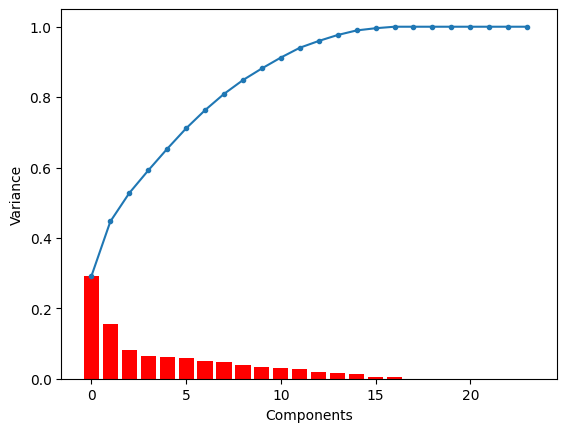

In [31]:
plt.plot(np.cumsum(t_pca.explained_variance_ratio), marker = '.')
plt.bar(list(range(0,24)),t_pca.explained_variance_ratio, color = 'r')
plt.xlabel('Components')
plt.ylabel('Variance')

In [27]:
t_pca.explained_variance_ratio.shape

(24,)

Text(0, 0.5, 'Variance')

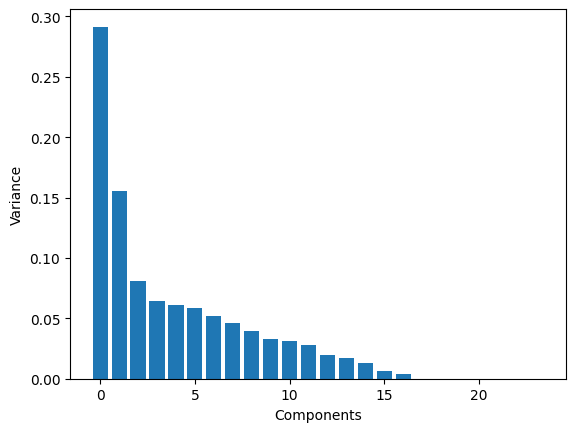

In [29]:
plt.bar(list(range(0,24)),t_pca.explained_variance_ratio)
plt.xlabel('Components')
plt.ylabel('Variance')

In [9]:
t_pca.fit(24)[0] 

..\src\own_code\own_pca.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  self.eigenvalues = self.eigenvalues.astype(float)
..\src\own_code\own_pca.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  self.eigenvectors = np.array([-self.eigenvectors[i] if i%2 != 0 else self.eigenvectors[i] for i in range(len(self.eigenvectors))]).astype(float)


array([-8.03700046e-01,  1.22139165e+00,  9.74873213e-02,  3.41060582e-01,
       -5.57834237e-01,  6.74738509e-01,  6.48617178e-01,  2.79975440e-02,
        1.01804963e+00, -5.85871613e-02, -1.12187596e-02,  2.89553813e-02,
        1.64812066e-01, -2.34603668e-01,  3.97637191e-02, -2.02455926e-02,
       -3.21741217e-02,  5.55111512e-17,  8.32667268e-17,  1.94289029e-16,
       -1.94289029e-16, -1.11022302e-16,  5.55111512e-17,  1.11022302e-16])

In [21]:
pca.transform(x)[0]

array([-8.03700046e-01, -1.22139165e+00, -9.74873213e-02, -3.41060582e-01,
        5.57834237e-01,  6.74738509e-01, -6.48617178e-01,  2.79975440e-02,
       -1.01804963e+00, -5.85871613e-02,  1.12187596e-02,  2.89553813e-02,
        1.64812066e-01, -2.34603668e-01,  3.97637191e-02, -2.02455926e-02,
       -3.21741217e-02,  2.04588950e-16,  7.46202145e-17, -4.64038530e-16,
       -1.61329283e-16,  1.26092713e-16,  5.55111512e-17, -8.67361738e-17])

In [22]:
t_pca.reconstructed_data[0]

array([-1.03816735e+00, -1.10856349e-01, -1.24900090e-15,  1.00000000e+00,
        1.77635684e-15, -6.66133815e-16, -3.95516953e-16, -2.77555756e-17,
        1.00000000e+00,  0.00000000e+00,  7.21644966e-16,  1.00000000e+00,
       -1.94289029e-15,  1.00000000e+00,  5.55111512e-17,  1.00000000e+00,
       -1.05471187e-15,  6.66133815e-16,  1.24900090e-16, -3.05311332e-16,
        1.00000000e+00,  4.44089210e-16,  1.00000000e+00, -6.93889390e-17])

In [153]:
pca.inverse_transform(pca.transform(x))[0]

array([-1.13305889, -2.96712079, -0.8961284 , -4.37171552,  0.47595645,
       -2.39200018,  1.5953873 , -0.45139994,  1.14640786,  1.36894007,
       -0.04066834,  2.40326321, -1.92626852,  1.90212466, -0.91687876,
        0.84286296])

In [154]:
x[0]

array([-1.13305889, -2.96712079, -0.8961284 , -4.37171552,  0.47595645,
       -2.39200018,  1.5953873 , -0.45139994,  1.14640786,  1.36894007,
       -0.04066834,  2.40326321, -1.92626852,  1.90212466, -0.91687876,
        0.84286296])